# Lab Report 2: Data Analysis Tasks

This notebook contains the implementation of various data analysis tasks including:
1. Data Binning (Discretization)
2. Standardization using Z-Score
3. Handling Categorical Data (Encoding)
4. Handling Missing Values
5. Data Visualization

Let's start by importing the required libraries.

First, let's install the required packages if they're not already installed:

In [52]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\su123\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Set up the plotting style
sns.set_theme(style='whitegrid')  # This sets up seaborn's plotting style
plt.style.use('default')  # Use matplotlib's default style as base

## Task 1: Data Binning (Discretization)

In this task, we'll create a dataset with continuous numerical values and perform data binning.

Original Data:


,ID,Age
0,1,69
1,2,32
2,3,78
3,4,38
4,5,41



Distribution of Age Groups:


Age_Group
18-25    19
26-35    12
36-50    15
51-65    23
65+      31
Name: count, dtype: int64

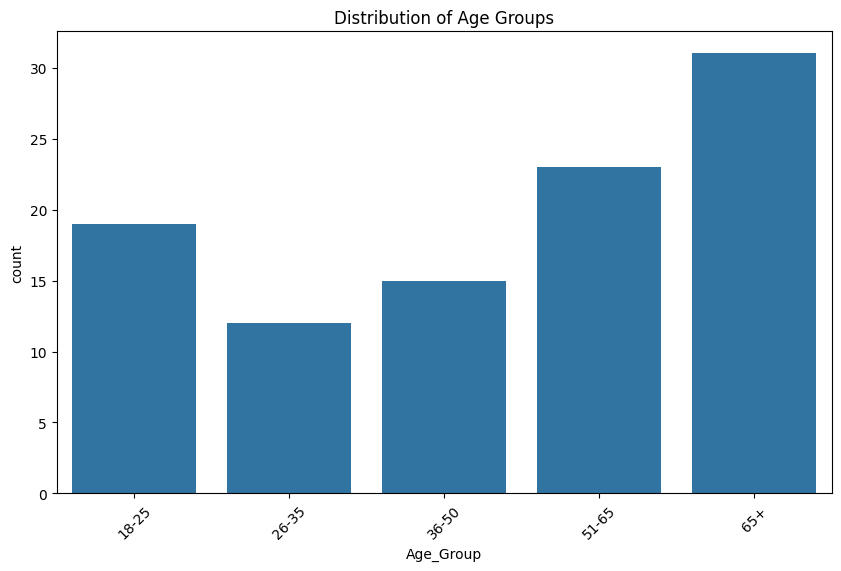

In [30]:
# Create sample data for binning
np.random.seed(42)
data_binning = pd.DataFrame({
    'ID': range(1, 101),
    'Age': np.random.randint(18, 85, 100)
})

# Display first few rows
print("Original Data:")
display(data_binning.head())

# Create bins
bins = [0, 25, 35, 50, 65, 100]
labels = ['18-25', '26-35', '36-50', '51-65', '65+']

# Perform binning
data_binning['Age_Group'] = pd.cut(data_binning['Age'], bins=bins, labels=labels)

# Display distribution
print("\nDistribution of Age Groups:")
display(data_binning['Age_Group'].value_counts().sort_index())

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data_binning, x='Age_Group')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

## Task 2: Standardization using Z-Score

In this task, we'll create a dataset with exam scores and apply Z-score normalization.

Original and Standardized Scores:


,ID,Exam_Score,Z_Score
0,1,65.66,-0.865986
1,2,82.84,1.086306
2,3,68.85,-0.503482
3,4,78.33,0.573801
4,5,61.19,-1.373945


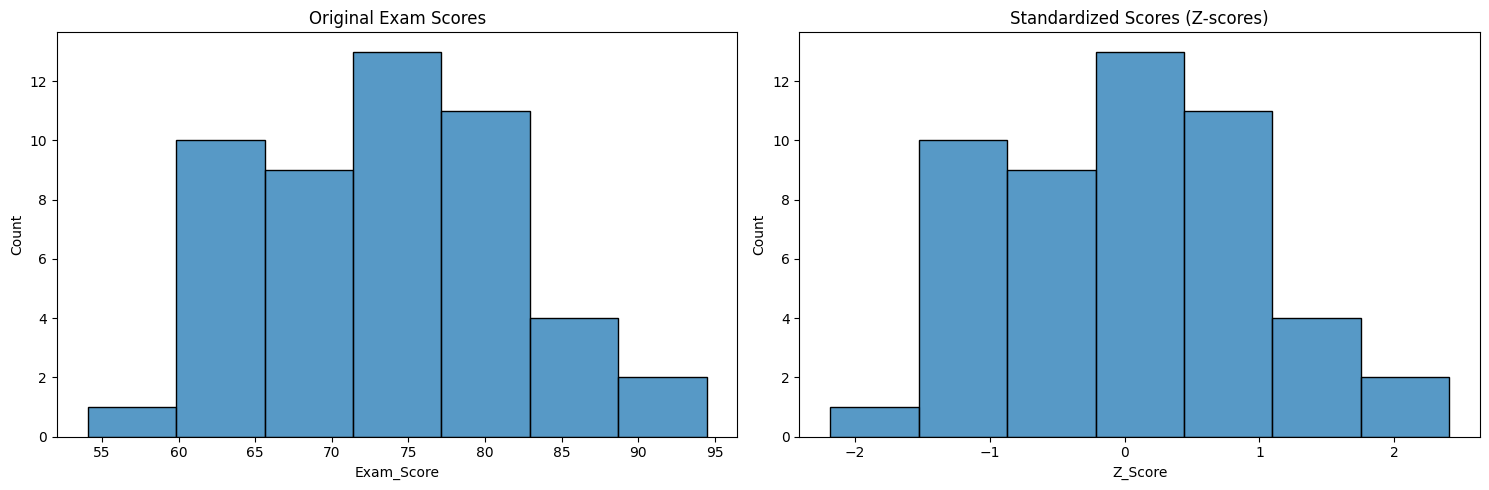

In [31]:
# Create sample data for standardization
zscore_data = pd.DataFrame({
    'ID': range(1, 51),
    'Exam_Score': np.random.normal(75, 10, 50).round(2)
})

# Calculate Z-scores
mean_score = zscore_data['Exam_Score'].mean()
std_score = zscore_data['Exam_Score'].std()
zscore_data['Z_Score'] = (zscore_data['Exam_Score'] - mean_score) / std_score

# Display results
print("Original and Standardized Scores:")
display(zscore_data.head())

# Visualize distribution before and after standardization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=zscore_data, x='Exam_Score', ax=ax1)
ax1.set_title('Original Exam Scores')

sns.histplot(data=zscore_data, x='Z_Score', ax=ax2)
ax2.set_title('Standardized Scores (Z-scores)')

plt.tight_layout()
plt.show()

## Task 3: Handling Categorical Data (Encoding)

In this task, we'll create a dataset with categorical values and apply both Label Encoding and One-Hot Encoding.

In [46]:
# Create sample categorical data
categorical_data = pd.DataFrame({
    'ID': range(1, 51),
    'Color': np.random.choice(['Red', 'Blue', 'Green', 'Yellow'], 50),
    'Size': np.random.choice(['Small', 'Medium', 'Large'], 50)
})

# Label Encoding
label_encoder = LabelEncoder()
categorical_data['Color_Label'] = label_encoder.fit_transform(categorical_data['Color'])
categorical_data['Size_Label'] = label_encoder.fit_transform(categorical_data['Size'])

# One-Hot Encoding
color_dummies = pd.get_dummies(categorical_data['Color'], prefix='Color')
size_dummies = pd.get_dummies(categorical_data['Size'], prefix='Size')

# Combine the encoded data
encoded_data = pd.concat([categorical_data, color_dummies, size_dummies], axis=1)

# Display results
print("Original Data:")
display(categorical_data.head())

print("\nOne-Hot Encoded Data:")
display(encoded_data.head())

Original Data:


,ID,Color,Size,Color_Label,Size_Label
0,1,Red,Small,2,2
1,2,Red,Large,2,0
2,3,Green,Large,1,0
3,4,Yellow,Large,3,0
4,5,Green,Medium,1,1



One-Hot Encoded Data:


,ID,Color,Size,Color_Label,Size_Label,Color_Blue,Color_Green,Color_Red,Color_Yellow,Size_Large,Size_Medium,Size_Small
0,1,Red,Small,2,2,False,False,True,False,False,False,True
1,2,Red,Large,2,0,False,False,True,False,True,False,False
2,3,Green,Large,1,0,False,True,False,False,True,False,False
3,4,Yellow,Large,3,0,False,False,False,True,True,False,False
4,5,Green,Medium,1,1,False,True,False,False,False,True,False


## Task 4: Handling Missing Values

In this task, we'll create a dataset with missing values and handle them using different techniques.

In [50]:
# Create sample data with missing values
np.random.seed(42)
n_samples = 50

missing_data = pd.DataFrame({
    'ID': range(1, n_samples + 1),
    'Name': [f'Person_{i}' for i in range(1, n_samples + 1)],
    'Age': np.random.randint(25, 60, n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'Salary': np.random.randint(40000, 90000, n_samples)
})

# Introduce missing values
missing_data.loc[np.random.choice(n_samples, 5), 'Age'] = np.nan
missing_data.loc[np.random.choice(n_samples, 5), 'Gender'] = np.nan
missing_data.loc[np.random.choice(n_samples, 5), 'Salary'] = np.nan

print("Original Data with Missing Values:")
display(missing_data.head(10))
print("\nMissing Value Count:")
display(missing_data.isnull().sum())

# Handle missing values
cleaned_data = missing_data.copy()

# Fill numerical missing values with mean
cleaned_data['Age'] = cleaned_data['Age'].fillna(cleaned_data['Age'].mean())
cleaned_data['Salary'] = cleaned_data['Salary'].fillna(cleaned_data['Salary'].mean())

# Fill categorical missing values with mode
cleaned_data['Gender'] = cleaned_data['Gender'].fillna(cleaned_data['Gender'].mode()[0])

print("\nCleaned Data:")
display(cleaned_data.head(10))
print("\nMissing Value Count after cleaning:")
display(cleaned_data.isnull().sum())

Original Data with Missing Values:


,ID,Name,Age,Gender,Salary
0,1,Person_1,53.0,Female,NaN
1,2,Person_2,39.0,Female,78660.0
2,3,Person_3,32.0,Female,43561.0
3,4,Person_4,45.0,Female,66854.0
4,5,Person_5,43.0,Female,78952.0
5,6,Person_6,NaN,Female,62662.0
6,7,Person_7,35.0,Male,48392.0
7,8,Person_8,35.0,Female,70535.0
8,9,Person_9,48.0,Male,53067.0
9,10,Person_10,48.0,Female,88033.0



Missing Value Count:


ID        0
Name      0
Age       4
Gender    5
Salary    5
dtype: int64


Cleaned Data:


,ID,Name,Age,Gender,Salary
0,1,Person_1,53.000000,Female,64650.555556
1,2,Person_2,39.000000,Female,78660.000000
2,3,Person_3,32.000000,Female,43561.000000
3,4,Person_4,45.000000,Female,66854.000000
4,5,Person_5,43.000000,Female,78952.000000
5,6,Person_6,40.804348,Female,62662.000000
6,7,Person_7,35.000000,Male,48392.000000
7,8,Person_8,35.000000,Female,70535.000000
8,9,Person_9,48.000000,Male,53067.000000
9,10,Person_10,48.000000,Female,88033.000000



Missing Value Count after cleaning:


ID        0
Name      0
Age       0
Gender    0
Salary    0
dtype: int64

## Task 5: Data Visualization

In this task, we'll create various visualizations using the cleaned dataset from Task 4.

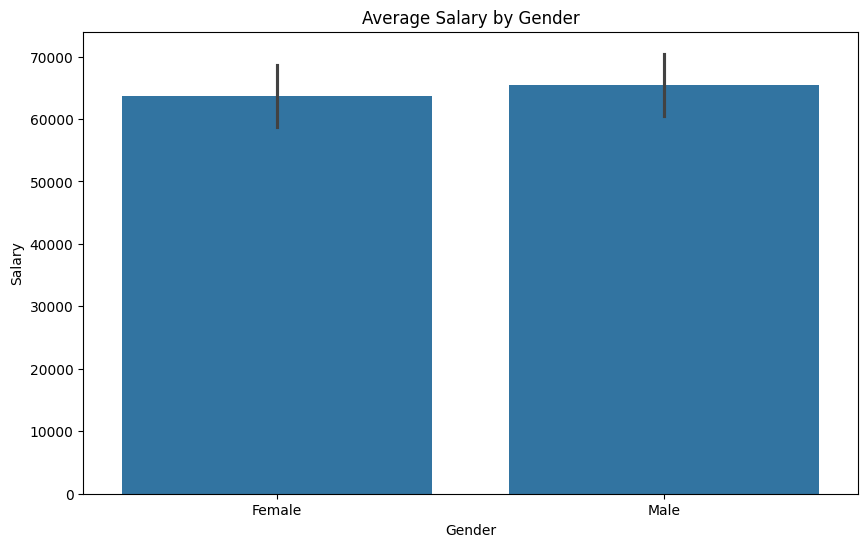

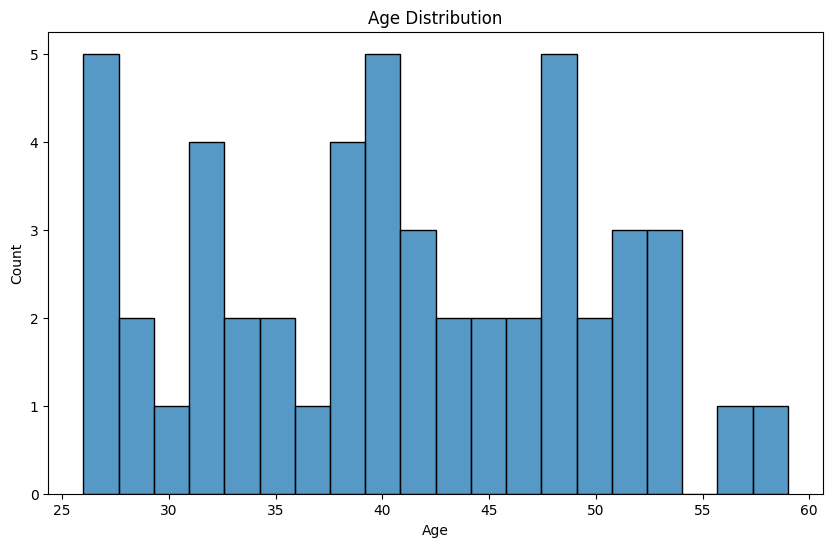

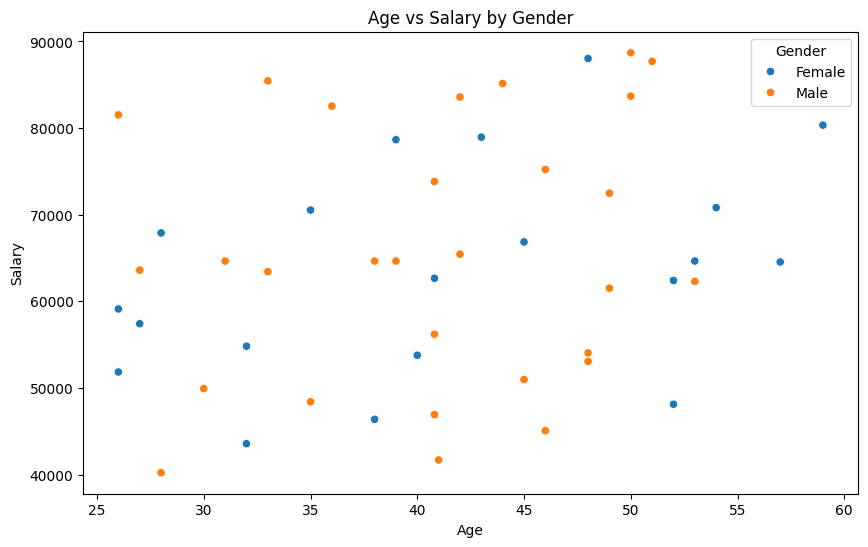

KeyboardInterrupt: 

In [51]:
# 1. Bar Plot: Average Salary by Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=cleaned_data, x='Gender', y='Salary')
plt.title('Average Salary by Gender')
plt.show()

# 2. Histogram: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='Age', bins=20)
plt.title('Age Distribution')
plt.show()

# 3. Scatter Plot: Age vs Salary with Gender encoding
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='Age', y='Salary', hue='Gender')
plt.title('Age vs Salary by Gender')
plt.show()

# 4. Pair Plot
numeric_cols = ['Age', 'Salary']
sns.pairplot(cleaned_data[numeric_cols + ['Gender']], hue='Gender')
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()